#Pandas and Scikitlearn

##Pandas

The first step of the project is to import numpy in your code.

In [1]:
import pandas as pd
pd.__version__

'1.3.4'

Then, we need a dataset to analyse our data. You can use the dataset from our github repository on life expectancy by importing it with the following code.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marianopolis-ai/workshop-code/master/6-pandas-sklearn-who/life_expectancy_data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


The following code verifies if there is missing values in the dataframe.

In [22]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see that there is a lot of missing values in many columns. For example, there are 194 missing values in the 'Alcohol' column.

The following code deletes/drops the rows that have missing values. 

In [23]:
df = df.dropna()
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

As we can see, there is no missing values left. 

Now, it is time to drop the columns that we don't need. The 'Country', 'Year', and 'Status' columns are not relevant for Linear Regression  as they are categorical values. We can therefore drop them.

In [24]:
data = df.drop(columns=["Country", "Year", "Status"])

Now, we can take the 'Life expectancy' column seperatly, and store it in **y**.

In [25]:
y = df['Life expectancy']
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 1649, dtype: float64

For the rest of remaining columns, we can store them as **x**.

In [26]:
x = data.drop(columns=["Life expectancy"])
x

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


We are now done with cleaning the dataframe.

##Scikitlearn

Everytime we create a model, we want to evaluate its performance . To do so, we will be using a train-test split. The model will only learn from train
It will be evaluated on test. 

We can import a method that splits our data into train, and test from sklearn. The test_size parameter indicates the percentage of the data that will be put into test.


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


We can check the shape of x_train, y_train, x_test, and y_test to see if everything seems ok. 

In [28]:
x_train.shape

(1319, 18)

In [29]:
y_train.shape

(1319,)

In [30]:
x_test.shape

(330, 18)

In [31]:
y_test.shape

(330,)

The next step is to use a Linear Regression model. Fortunatly, we don't need to understand all the math behind Linear Regression at the moment, because we can just import a Linear Regression model from scikitlearn.

We can use model.fit to train the model using x_train, and y_train as parameters. 

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Next, we can use the newly trained model to predict the values of x_test.

In [33]:
preds = model.predict(x_test)
preds

array([75.99792761, 74.24549023, 64.44465596, 66.40261464, 71.25047896,
       69.07669055, 60.24319321, 78.47490936, 62.98969763, 63.08603662,
       67.07935249, 72.33209782, 76.32292016, 73.3802082 , 67.37506863,
       70.55768806, 81.62932251, 61.50733089, 72.32162195, 77.05723097,
       72.25001049, 46.12262338, 64.21434061, 52.85871237, 76.5985881 ,
       65.3877695 , 65.36649106, 52.41387319, 67.75765951, 65.33363633,
       53.37502132, 70.46241841, 74.80623667, 71.43106124, 60.03054343,
       73.7883216 , 81.77848448, 75.81885598, 74.06764971, 70.90250889,
       71.2982821 , 61.68546247, 72.35543516, 71.81649213, 72.15961581,
       77.43755177, 66.3415542 , 69.19456772, 69.67992307, 73.51431136,
       72.34333042, 76.46439555, 69.71415144, 71.24778754, 84.52786913,
       65.26870828, 77.58876993, 56.66774691, 73.67612189, 78.89285515,
       78.53646611, 66.78479387, 57.63686555, 60.40434785, 67.77561709,
       60.77442891, 51.91319972, 64.50178668, 74.44831011, 62.91

Using the mean_squared_error, we can quantify the error of the predicted values (preds) by comparing it with y_test.

We can also calculate its RMSE (which is simply the root of the MSE, to get a more accurate picture of our deviation)

Finally, we'll calculate the MAE (mean absolute error), and the MA%E (mean absolute percent error)

The MAE is the mean of the absolute values of y_test - y_pred for every y_test, y_pred.

Here are all the links you need:
- [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error#sklearn.metrics.mean_absolute_error)
- [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error)
- RMSE : simply take the sqrt of the MSE by doing `mse ** 0.5`

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test,preds)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test,preds)
print(f"MSE : {mse}")
print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

MSE : 12.738180233827006
RMSE: 3.5690587321907445
MAE : 2.7467919398586913


Use the matplotlib library to see how the model predicts the data visually. 
- We start by storing the index of a stored the array of **preds**. 
- Next, we plot our predictions in a sorted matter.
- The actual y values will also be plotted in the indexes being in the same order of preds.

The comparison between our prediction, and true value are shown below.


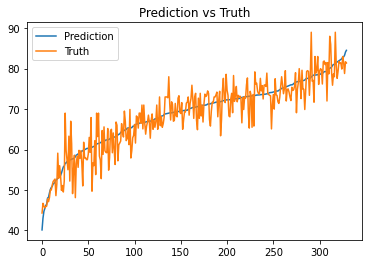

In [45]:
import matplotlib.pyplot as plt
import numpy as np
inds = np.arange(0,len(preds))
sorted_inds = np.argsort(preds)
plt.title("Prediction vs Truth")
plt.plot(inds,preds[sorted_inds], label="Prediction")
plt.plot(inds,y_test.values[sorted_inds], label="Truth")
plt.legend()
plt.show()

The last graph is the Residual Plot. The residual plot calculates the difference between the values predicted, and the true values. 

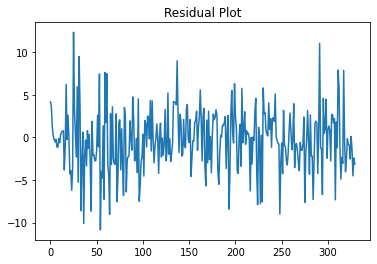

In [46]:
residuals = y_test.values[sorted_inds]-preds[sorted_inds]
plt.title("Residual Plot")
plt.plot(inds,residuals)
plt.show()

As you can see, the difference between the predictions, and the truth ranges between -10 and 10 approximately. It is not that bad.

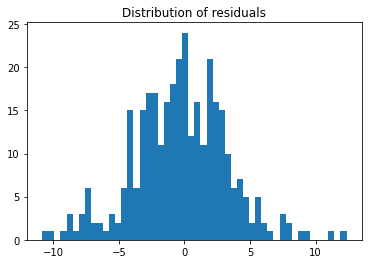

In [47]:
plt.title("Distribution of residuals")
plt.hist(residuals,bins=50)
plt.show()

In [48]:
pd.Series(residuals).describe()

count    330.000000
mean      -0.297468
std        3.562042
min      -10.859157
25%       -2.569222
50%       -0.209844
75%        2.076548
max       12.364091
dtype: float64

# R^2 Metric
Finally, we'll use something called the R^2 metric to measure how good our model is just by looking at a number!\
Find out more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [49]:
from sklearn.metrics import r2_score
print(f"R^2 coefficient: {r2_score(preds,y_test)}")

R^2 coefficient: 0.8118645794412714


#DONE!!!